In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

imdb = keras.datasets.imdb
#参数 num_words=10000 会保留训练数据中出现频次在前 10000 位的字词。
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


## 探索数据

该数据集已经过预处理：每个样本都是一个整数数组，表示影评中的字词。

每个标签都是整数值 0 或 1，其中 0 表示负面影评，1 表示正面影评。

In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


影评文本已转换为整数，其中每个整数都表示字典中的一个特定字词。第一条影评如下所示：

In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
#影评的长度可能会有所不同。神经网络的输入必须具有相同长度
len(train_data[0]),len(train_data[1])

(218, 189)

## 将整数转换回字词

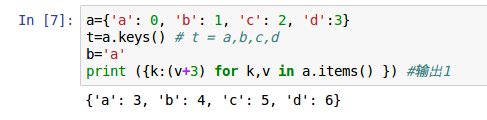

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

**dict.get(key, default=None)**

* key -- 字典中要查找的键。

* default -- 如果指定键的值不存在时，返回该默认值值。

返回指定键的值，如果值不在字典中返回默认值None。

**join()**

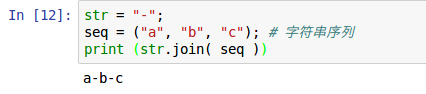

In [7]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [8]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

**pad_sequences**

keras.preprocessing.sequence.pad_sequences(sequences, maxlen=None, dtype=’int32’, padding=’pre’, truncating=’pre’, value=0.) 

参数 
sequences：浮点数或整数构成的两层嵌套列表

maxlen：None或整数，为序列的最大长度。大于此长度的序列将被截短，小于此长度的序列将在后部填0.

dtype：返回的numpy array的数据类型

padding：‘pre’或‘post’，确定当需要补0时，在序列的起始还是结尾补

truncating：‘pre’或‘post’，确定当需要截断序列时，从起始还是结尾截断

value：浮点数，此值将在填充时代替默认的填充值0

In [9]:
#检查（现已填充的）第一条影评：
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

## 构建模型
神经网络通过堆叠层创建而成，这需要做出两个架构方面的主要决策：

* 要在模型中使用多少个层？
* 要针对每个层使用多少个隐藏单元？

In [10]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


按顺序堆叠各个层以构建分类器：

1. 第一层是 Embedding 层。该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量。模型在接受训练时会学习这些向量。这些向量会向输出数组添加一个维度。生成的维度为：(batch, sequence, embedding)。

2. 接下来，一个 GlobalAveragePooling1D 层通过对序列维度求平均值，针对每个样本返回一个长度固定的输出向量。这样，模型便能够以尽可能简单的方式处理各种长度的输入。

3. 该长度固定的输出向量会传入一个全连接 (Dense) 层（包含 16 个隐藏单元）。

4. 最后一层与单个输出节点密集连接。应用 sigmoid 激活函数后，结果是介于 0 到 1 之间的浮点值，表示概率或置信水平。

## 损失函数和优化器

由于这是一个二元分类问题且模型会输出一个概率（应用 S 型激活函数的单个单元层），

因此我们将使用 binary_crossentropy 损失函数。

该函数并不是唯一的损失函数，例如，您可以选择 mean_squared_error。

但一般来说，binary_crossentropy 更适合处理概率问题，它可测量概率分布之间的“差距”，在本例中则为实际分布和预测之间的“差距”。

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 创建验证集

在训练时，我们需要检查模型处理从未见过的数据的准确率。

我们从原始训练数据中分离出 10000 个样本，创建一个验证集。

（为什么现在不使用测试集？我们的目标是仅使用训练数据开发和调整模型，然后仅使用一次测试数据评估准确率。）

In [12]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 训练模型

用有 512 个样本的小批次训练模型 40 个周期。

这将对 x_train 和 y_train 张量中的所有样本进行 40 次迭代。

在训练期间，监控模型在验证集的 10000 个样本上的损失和准确率：

tf.keras.Model.fit 采用三个重要参数：

1. **epochs：**以周期为单位进行训练。一个周期是对整个输入数据的一次迭代（以较小的批次完成迭代）。

2. **batch_size：**当传递 NumPy 数据时，模型将数据分成较小的批次，并在训练期间迭代这些批次。此整数指定每个批次的大小。请注意，如果样本总数不能被批次大小整除，则最后一个批次可能更小。

3. **validation_data：**在对模型进行原型设计时，您需要轻松监控该模型在某些验证数据上达到的效果。传递此参数（输入和标签元组）可以让该模型在每个周期结束时以推理模式显示所传递数据的损失和指标。

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 3s 201us/sample - loss: 0.6922 - accuracy: 0.5098 - val_loss: 0.6910 - val_accuracy: 0.4973
Epoch 2/40
15000/15000 [==============================] - 2s 124us/sample - loss: 0.6879 - accuracy: 0.5724 - val_loss: 0.6847 - val_accuracy: 0.5950
Epoch 3/40
15000/15000 [==============================] - 2s 120us/sample - loss: 0.6770 - accuracy: 0.6673 - val_loss: 0.6705 - val_accuracy: 0.6896
Epoch 4/40
15000/15000 [==============================] - 2s 137us/sample - loss: 0.6564 - accuracy: 0.7044 - val_loss: 0.6467 - val_accuracy: 0.7348
Epoch 5/40
15000/15000 [==============================] - 2s 118us/sample - loss: 0.6254 - accuracy: 0.7588 - val_loss: 0.6146 - val_accuracy: 0.7625
Epoch 6/40
15000/15000 [==============================] - 2s 120us/sample - loss: 0.5858 - accuracy: 0.8003 - val_loss: 0.5766 - val_accuracy: 0.7824
Epoch 7/40
15000/15000 [==========================

## 评估模型

In [14]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 3s 110us/sample - loss: 0.3323 - accuracy: 0.8708
[0.33228434905052184, 0.8708]


## 创建准确率和损失随时间变化的图

model.fit() 返回一个 History 对象，该对象包含一个字典，其中包括训练期间发生的所有情况：

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

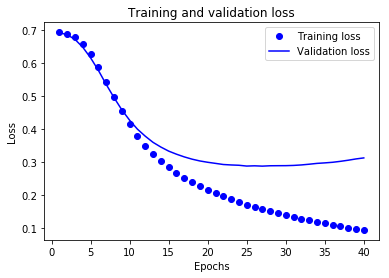

In [16]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()#显示图例

plt.show()

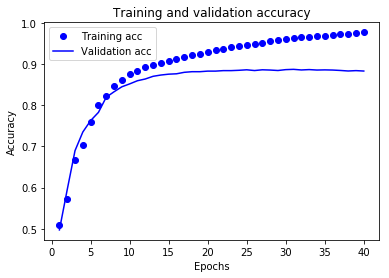

In [17]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()